# Testes da rotina da classe do Mapa de Hénon

## 1. Importando as bibliotecas necessárias

### Bibliotecas obrigatórias

In [1]:
import numpy as np

#%matplotlib widget
import matplotlib.pyplot as plt

import seaborn as sns # a biblioteca 'seaborn' contém vários estilos para os gráficos do 'matpĺotlib'

# agora, melhoramos a qualidade de saida e de visualizacao da imagem 
# alem de mudar a fonte padrao para uma do latex
sns.set_style("ticks")
plt.rcParams['savefig.dpi'] = 200
plt.rcParams["figure.dpi"] = 100

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

### Bibliotecas não-obrigatórias

In [2]:
import sys 
sys.path.insert(0, '../../scripts')
import henonmap as hm

## 2. Definindo a função (debug)

Não é necessário executar essa linha se você estiver importando o arquivo com a classe.

In [91]:
class MapaHenon:

    def __init__(self, a, b, posicao_inicial):
        """
        Descrição:
        ----------
        Construtor da classe 'MapaHenon'

        Parâmetros:
        -----------
        a: float
            Parâmetro do Mapa de Hénon
        b: float
            Parâmetro do Mapa de Hénon
        posicao_inicial: np.ndarray
            Parâmetro das posições xy iniciais do mapa
        """

        if not ((type(a) is float) & (type(b) is float)):
            raise TypeError("Os parâmetros devem ser floats!")
            
        if not (type(posicao_inicial) is np.ndarray):
            raise TypeError("O vetor posição inicial deve ser um array do numpy!")

        self.__a = a
        self.__b = b
        self._x_atual = posicao_inicial[0]
        self._y_atual = posicao_inicial[1]
        pass

    def iterar(self):
        """
        Descrição:
        ----------
        Aplicar as equações de diferenças do Mapa e Hénon para os pontos e parâmetrs atuais

        Parâmetros:
        -----------
        Nenhum
        """

        a = self.__a
        b = self.__b
        x = self._x_atual
        y = self._y_atual

        prox_x = 1 - a*(x**2) + y
        prox_y = b*x
        self._x_atual = prox_x
        self._y_atual = prox_y
        pass

    def posicao(self):
        """
        Descrição:
        ----------
        Retorna a posição x,y atual do mapa

        Parâmetros:
        -----------
        Nenhum
        """

        x = self._x_atual
        y = self._y_atual

        posicao = np.array([x, y])
        return posicao

## 3. Testando

In [3]:
a = 1.4
b = 0.3
posicao = np.array([1.0, 0.0])

mapa = hm.MapaHenon(a=1.4, b=0.3, posicao_inicial=posicao)

In [4]:
n_iteracoes = 100000

for n in range(0, n_iteracoes):
    mapa.iterar()
    posicao = np.vstack((posicao, mapa.posicao()))

In [5]:
x = posicao[:, 0]
y = posicao[:, 1]

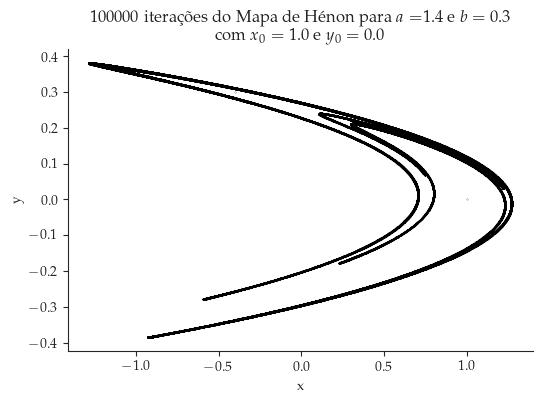

In [6]:
fig, ax = plt.subplots()
ax.scatter(x, y, color='Black', s = 0.1, marker=".")

ax.set_title(str(n_iteracoes) + " iterações do Mapa de Hénon para $a =$" + str(a) + " e $b =$ " + str(b) + "\n com $x_{0} =$ " + str(x[0]) + " e $y_{0} =$ " + str(y[0]))
ax.set_ylabel('y')
ax.set_xlabel('x')
    
ax.grid(False)
sns.despine()
plt.show()